1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math

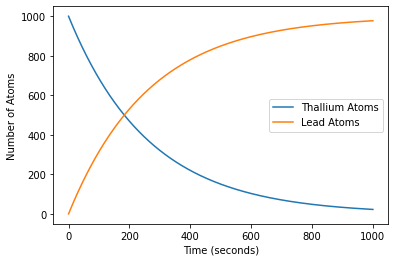

Text(0.5, 1.0, 'Histogram of atoms that have not decayed')

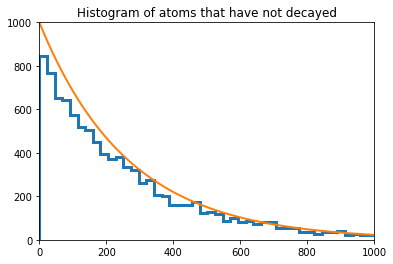

In [9]:

t = np.linspace(0, 1000,1000)
tau = 3.052*60

def prob(time, tau=3.052*60):
    return 1. - 2**(-time/tau) 

Tl = 1000 #initial number of Thallium atoms

plt.figure()
plt.plot(t, Tl*(1 - prob(t)), label='Thallium Atoms')
plt.plot(t, Tl* prob(t), label='Lead Atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.legend(loc = 'best')
plt.show()

def p(time, tau = 3.052*60):
    return (2**(-time/tau) * math.log(2)/tau)

def p_cdf(time, tau = 3.052*60):
    return 1. - 2**(-time/tau)

def p_icdf(y, tau=3.052*60):
    result = []
    for el in y:
        result.append(-tau * math.log(1-el, 2))
    return np.array(result)

atoms = np.random.random(10000)
decayed_atoms = p_icdf(atoms)

plt.figure()
plt.hist(decayed_atoms, histtype='step', bins=100, density=False, linewidth=3)
plt.plot(t, Tl*(1-p_cdf(t)), linewidth=2)
plt.axis([0, 1000, 0 ,1000])
plt.title("Histogram of atoms that have not decayed")

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

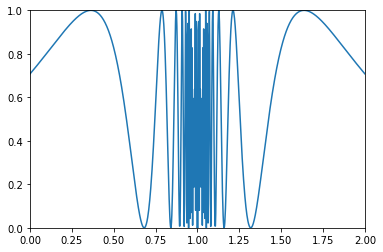

Integral with the hit/miss method: 1.34892
Hit/miss: 
Mean: 1.3474363999999996
Standard deviation 0.0034754837130966396

Mean value method integral:  1.3442548565423709
With an error:  0.03162277660168379


In [19]:
def f(x):
    return np.sin(1/(1-x))**2

x = np.linspace(0,2,1000)
plt.plot(x,f(x))
plt.axis([0,2,0,1])
plt.show()

N= 100000
c = 0
for i in range(N):
    x = 2*np.random.random()
    y = np.random.random()
    if y < f(x): c += 1
I = 2*c/N
print('Integral with the hit/miss method:', I)

l=[]
for i in range(50):
    c = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()  
        if y < f(x): c += 1
    l.append(2 * c / N)

print("Hit/miss: \nMean:", np.mean(l)) 
print("Standard deviation", np.std(l))

x = np.linspace(0,2,1000)
mean_2 = (2/1000) * np.sum(f(x))
print("\nMean value method integral: ", mean_2)
std = 1/np.sqrt(1000)
print("With an error: ",std)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [26]:
def circle(x,y):
    if (x**2 + y**2) <= 1:
        return 1
    else:
        return 0

# Integral with hit/miss method
N = 100000
dim = 2
b = 1
a = - 1
count = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    z = np.random.random()
    if z <= circle(x,y):
        count += 1
        
I = (((b-a)**dim)/N)*count
print('Integral for the 2D circle: ', I)

#Generalize the result for the 10D sphere
dim = 10
count = 0
for i in range(N):
    l = np.zeros(dim)
    for ndim in range(dim):
        l[ndim] = np.random.random()
    if np.sum(l**2) <= 1:
        count += 1

I = (((b-a)**dim)/N)*count

print('Integral for the 10th dimensional sphere:', I)


Integral for the 2D circle:  3.1444
Integral for the 10th dimensional sphere: 2.7136


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [30]:
# Define the function
def f(x):
    return ((x**(-0.5))/(np.exp(x) + 1))

# Weights function
def w(x):
    return (1/np.sqrt(x))

def int_w(x,a,b):
    return (2*math.sqrt(b) - 2*math.sqrt(a))

N = 100
a = 0
b = 1
summ = []
for i in range(N):
    x = np.random.uniform(a,b) ** 2
    summ = np.append(summ, (f(x)/w(x)))

I = (sum(summ)/N)*int_w(x,a,b)
print('Integral with the importance sampling method: ', I, '\n')

Integral with the importance sampling method:  0.8319053011609725 

